<a href="https://colab.research.google.com/github/TanyaKumariNITRR/Smart_Expense_tracker/blob/main/Smart_Expense_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# My Expenses

In [32]:
transaction_data = pd.read_csv("/content/My_expenses.csv")

Ensure the Date column is in datetime format

In [33]:
transaction_data['Date'] = pd.to_datetime(transaction_data['Date'])

<ipython-input-33-2942dc9b5ce5>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transaction_data['Date'] = pd.to_datetime(transaction_data['Date'])


# Check for missing values and handle them

In [35]:
if transaction_data.isnull().sum().any():
    print("Warning: Missing values found. Please clean your data before proceeding.")
    exit()

# Check data types

In [36]:
print("\nData Types:")
print(transaction_data.dtypes)


Data Types:
Date          datetime64[ns]
Categories            object
Amount                 int64
dtype: object


# Convert Date to numerical days for prediction

In [37]:
transaction_data['Day'] = (transaction_data['Date'] - transaction_data['Date'].min()).dt.days

# Analyze spending habits by category

In [41]:
Category_spending = transaction_data.groupby('Categories')['Amount'].sum()
print("\nSpending by Category:")
print(Category_spending)



Spending by Category:
Categories
Bills      13729
Clothes     1450
Food        1377
Travel      1700
Name: Amount, dtype: int64


# Visualize spending habits

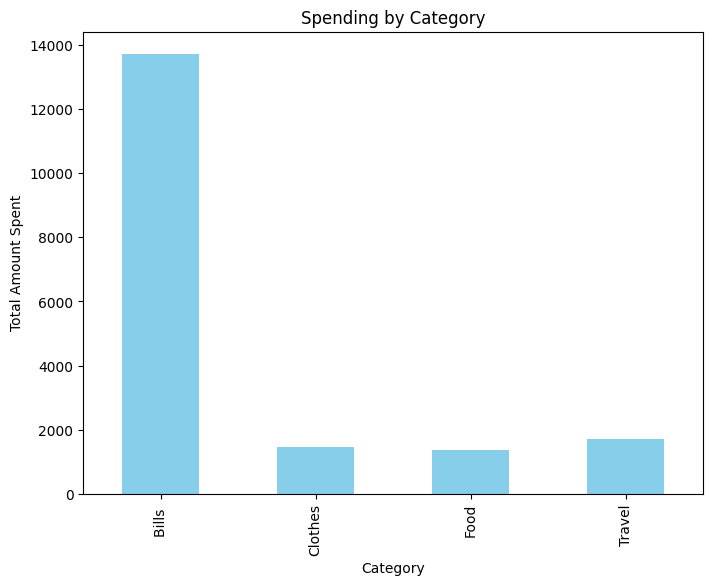

In [43]:
plt.figure(figsize=(8, 6))
Category_spending.plot(kind='bar', color='skyblue')
plt.title("Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Amount Spent")
plt.show()


# Prepare data for expense prediction

In [44]:
X = transaction_data[['Day']]
y = transaction_data['Amount']

# Split data into training and testing sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict future expenses

In [49]:
future_days = np.array(range(transaction_data['Day'].max() + 1, transaction_data['Day'].max() + 31)).reshape(-1, 1)
predicted_expenses = model.predict(future_days)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Visualize expense prediction

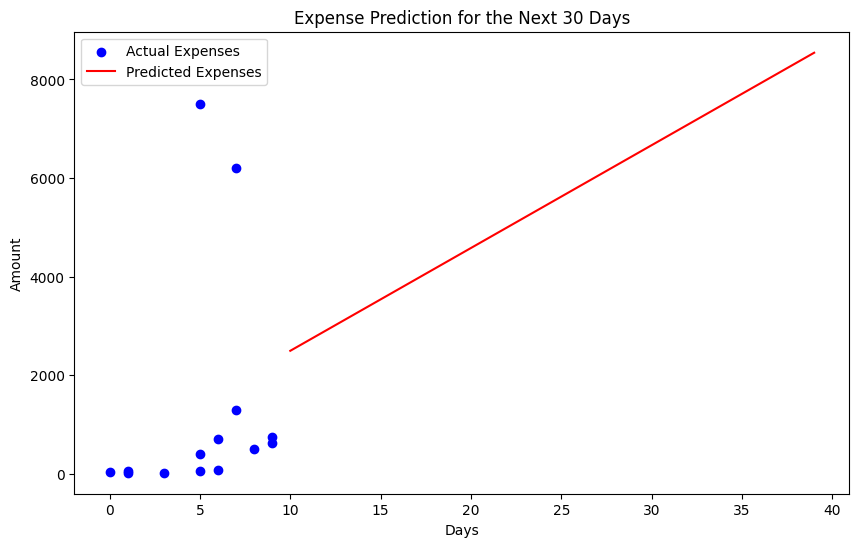

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(transaction_data['Day'], transaction_data['Amount'], color='blue', label='Actual Expenses')
plt.plot(future_days, predicted_expenses, color='red', label='Predicted Expenses')
plt.title("Expense Prediction for the Next 30 Days")
plt.xlabel("Days")
plt.ylabel("Amount")
plt.legend()
plt.show()

# Budget suggestion

In [52]:
avg_daily_expense = transaction_data['Amount'].mean()
suggested_budget = avg_daily_expense * 30
print(f"\nYour average daily expense is: ₹{avg_daily_expense:.2f}")
print(f"Suggested monthly budget: ₹{suggested_budget:.2f}")


Your average daily expense is: ₹1304.00
Suggested monthly budget: ₹39120.00
